# Lab 7 Goals

The goals of this lab are:

* To practice basic data cleaning, such as removing columns, dropping rows with missing values, and accessing row names of a dataframe.
* To implement $K$-means clustering, including selecting an appropriate value for $K$ and interpreting the cluster output. 
* To implement hierarchical clustering, including creation of dendrograms.

For this lab, it may be helpful to install and load the following modules:
 
* `matplotlib` 
* `numpy`
* `pandas`
* `plotnine`
* `random`
* `scipy`
* `sklearn`

In [4]:
import matplotlib
import numpy as np
import pandas as pd
import plotnine as p9
import random
import scipy
import sklearn

We will be using the Epicurious dataset from Labs 1 and 2. 

In [5]:
epi = pd.read_csv('/Users/amynussbaum/Documents/U of C/Courses/119/Week 1/Lab/epi_r.csv')

# Data Cleaning and Exploration

Recall that the Epicurious dataset, created by a Kaggle User, has [over 20,000 recipes from the website Epicurious](https://www.kaggle.com/datasets/hugodarwood/epirecipes/code). Loosely speaking, there are a few groups of variables in the dataset:
  
* The nutritional variables (`calories`, `protein`, `fat`, `sodium`)
* Ingredient tags (`almond`, `amaretto`, `anchovy`, and so on)
* Place tags (`alabama`, `alaska`, `aspen`, `australia`, and so forth)
* Other tags (`advance.prep.required`, `anthony.bourdain`, etc.)

1. Before we do anything else, look at the column names of `epi`. 


In [6]:
epi.columns

Index(['title', 'rating', 'calories', 'protein', 'fat', 'sodium', '#cakeweek',
       '#wasteless', '22-minute meals', '3-ingredient recipes',
       ...
       'yellow squash', 'yogurt', 'yonkers', 'yuca', 'zucchini', 'cookbooks',
       'leftovers', 'snack', 'snack week', 'turkey'],
      dtype='object', length=680)

2. Notice that the first column is called `title`. Print it out and examine it. 


In [7]:
epi['title']

0                    Lentil, Apple, and Turkey Wrap 
1        Boudin Blanc Terrine with Red Onion Confit 
2                      Potato and Fennel Soup Hodge 
3                   Mahi-Mahi in Tomato Olive Sauce 
4                          Spinach Noodle Casserole 
                            ...                     
20047                                Parmesan Puffs 
20048                Artichoke and Parmesan Risotto 
20049                         Turkey Cream Puff Pie 
20050       Snapper on Angel Hair with Citrus Cream 
20051    Baked Ham with Marmalade-Horseradish Glaze 
Name: title, Length: 20052, dtype: object

3. We've kind of ignored these type of variables so far--that is, variables that are ID numbers or names. They are technically a type of categorical variable and haven't really been useful to us so far. However, they can be very valuable much later in a clustering analysis, when we try to interpret the clusters. They are the most helpful when they are the row names rather than a separate variable column. Edit the line of code below to "re-import" the data with recipe titles as row names, and remember this trick for later!

In [8]:
epi = pd.read_csv('/Users/amynussbaum/Documents/U of C/Courses/119/Week 1/Lab/epi_r.csv', index_col = 'title')
epi.head()

,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
title,,,,,,,,,,,,,,,,,,,,,
"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


4. Now, check out the dataset with the usual suspects (`.head()`, `.shape()`, `.describe()`, etc.). Do you spot any issues with the data that might slow us down when attempting to analyze it?

In [9]:
epi.head()
epi.shape
epi.describe()

,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
count,20052.000000,1.593500e+04,15890.000000,1.586900e+04,1.593300e+04,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,...,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000
mean,3.714467,6.322958e+03,100.160793,3.468775e+02,6.225975e+03,0.000299,0.000050,0.000848,0.001346,0.000349,...,0.001247,0.026332,0.000050,0.000299,0.014861,0.000150,0.000349,0.001396,0.000948,0.022741
std,1.340829,3.590460e+05,3840.318527,2.045611e+04,3.333182e+05,0.017296,0.007062,0.029105,0.036671,0.018681,...,0.035288,0.160123,0.007062,0.017296,0.121001,0.012231,0.018681,0.037343,0.030768,0.149080
min,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.750000,1.980000e+02,3.000000,7.000000e+00,8.000000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.375000,3.310000e+02,8.000000,1.700000e+01,2.940000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.375000,5.860000e+02,27.000000,3.300000e+01,7.110000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,3.011122e+07,236489.000000,1.722763e+06,2.767511e+07,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


5. Pay careful attention to the `count` row. There should be 20,052 values for each variable, but you should be able to see that at least a few columns (e.g., calories) have fewer. This can be a sign of missing values.

If a column has less values than that given in the output of `epi.shape`, some of the values in that column are missing. Examine the following line of code to see what it is doing, and then run it. How many columns having at least one missing value?

In [10]:
sum(epi.describe().iloc[0,] < 20052)

4

\textcolor{blue}{The variables with missing values are the nutritional variables. }

7. In earlier labs, we focused on data cleaning and identifying unusual values in the nutritional variables. We could just drop rows with missing values, for example, with the `.dropna()` method, but I would like to focus on the "tag" variables in this lab, so let's delete the columns with numerical variables entirely.

Most of the time, I've been redefining dataframes with only a subset of columns by explicitly naming the variables I would like to keep. However, there are over 600 columns to keep here, and I don't really want to have to name all of them! Instead, I can supply the indices of the columns that I would like to keep. 

The line of code below returns a dataframe with all of the columns. Can you edit it so that I keep only the last 674 columns and drop the numerical variables (a.k.a., the first five columns)? Print out the column names to confirm.

In [11]:
epi = epi.iloc[:, 5:679]
epi.columns

Index(['#cakeweek', '#wasteless', '22-minute meals', '3-ingredient recipes',
       '30 days of groceries', 'advance prep required', 'alabama', 'alaska',
       'alcoholic', 'almond',
       ...
       'yellow squash', 'yogurt', 'yonkers', 'yuca', 'zucchini', 'cookbooks',
       'leftovers', 'snack', 'snack week', 'turkey'],
      dtype='object', length=674)

# $K$-Means Clustering

8. *From Week 7 Course Notes, Monday, May 1* Let's take a look at how to cluster with $K$-Means. The `sklearn` function [`KMeans`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) will do this for us--read the linked documentation to brush up on the syntax and see what kind of arguments you can change. I'm particularly interested in:

* `n_clusters`
* `n_init`

Obviously, `n_clusters` is the number of clusters. `n_init` is the number of times that we run the clustering algorithm. We mentioned in class that we need to run the clustering algorithm multiple times since there are random starts, this is especially true in large datasets like the one we are working with. 

The following lines of code create 12 clusters using 10 random starts. Can you edit them so that they create 6 clusters with 20 random starts? Save the object as `clust_1` so we can see what outputs are possible in the next few questions.

In [13]:
random.seed(944) ## keep this for reproducibility! You can change the seed if you want.

from sklearn.cluster import KMeans

kmeans1 = KMeans(n_clusters=6, n_init = 20)
clust_1 = kmeans1.fit(epi)

9. We are interested in a few outputs. First, the within cluster variation--in `sklearn`, this is called something different. Can you identify what object you should be extracting from the documentation? Once you find it, print it in the cell below.

\textcolor{blue}{The object is named } `inertia_` \textcolor{blue}{in } `sklearn`\textcolor{blue}{.}

In [14]:
clust_1.inertia_

168235.221353348

10. We used $K=6$ arbitrarily in Step 8., but of course we need to choose it. As I mentioned in class, we will need to write a loop and create the elbow plot to justify the choice of $K$. Fill in the loop below to get the inertia for values of $K$ from 1 to 25 (I'm picking a large number because the data is so large, in smaller datasets you may not need to go so far).

In [15]:
inertias = []

for i in range(1,26):
    kmeans = KMeans(n_clusters=i, n_init = 20)
    kmeans.fit(epi)
    inertias.append(kmeans.inertia_)

11. Now, let's create the elbow plot. First, create a data frame with two columns--one for the value of $K$ and one for the inertias.

In [16]:
chooseK = {'K': range(1, 26), 'Inertia': inertias}
chooseK_df = pd.DataFrame(data = chooseK)

12. Now, create the plot with $K$ on the $x$-axis and inertia on the $y$. Do you see a clear choice for $K$?


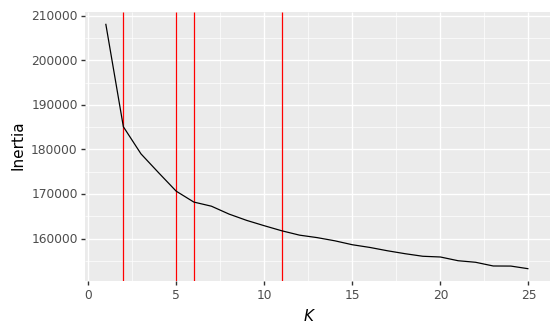

In [17]:
import plotnine as p9

print(p9.ggplot(chooseK_df, p9.aes(x = 'K', y = 'Inertia')) +
       p9.geom_vline(xintercept = 2, color = "red") + 
       p9.geom_vline(xintercept = 5, color = "red") + 
       p9.geom_vline(xintercept = 6, color = "red") + 
       p9.geom_vline(xintercept = 11, color = "red") +       
       p9.geom_line() +
       p9.scale_x_continuous(name = "$K$") + 
       p9.scale_y_continuous(name = "Inertia") +
       p9.theme(legend_position = "none", figure_size = [6, 3.5]))

13. There does not appear to be a very clear "elbow" in the plot (although it's not terrible, either). This happens sometimes. I might consider the values 2, 5, 6, or 11 based on my plot (yours will look different). Pick a value and create an object `clust_2` on the `epi` dataset.

In [18]:
kmeans2 = KMeans(n_clusters=11, n_init = 20)
clust_2 = kmeans2.fit(epi)

14. One other thing we are interested in are the actual labels. Using your `clust_2` object and the `sklearn` documentation, can you figure out how to print them out?


In [19]:
clust_2.labels_


array([3, 6, 8, ..., 2, 6, 6], dtype=int32)

15. Now comes the fun part! We can try to interpret each cluster. You might learn more advanced methods for visualizing the clusters in later classes, but in this class, the best we can do is just printing out the "names" of the points in the clusters to try and see if there's a pattern. Adapt the code below to print out the names of the points in Cluster 1, 2, etc. Try and give each one a name--this might depend on context clues, you will really have to think about what they all have in common!

In [41]:
epi.index[clust_2.labels_ == 0.0]

Index(['Mixed Berry Pavlovas ', 'Stout Floats ',
       'Banana Split with Curried Chocolate-Coconut Sauce ',
       'Blackberry-Raspberry Sauce ', 'Honey-Cinnamon Ice Cream ',
       'Lemon-Ginger Frozen Yogurt ',
       'Figs with Honey-Orange Mascarpone and Pistachio Brittle ',
       'Florida Ambrosia Salad ', 'Gingered Cantaloupe Shake ',
       'Chocolate Semifreddo with Chile-Chocolate Sauce ',
       ...
       'Cardamom and Lemon Rice Pudding ', 'Passion-Fruit Ice Cream ',
       'Vanilla Bean Ice Cream ', 'Fruit Cup with Lime Syrup ',
       'Spiced Fruit Compote ', 'Cider-Caramel Sauce ', 'Amaretti Tiramisu ',
       'Chocolate Chunks with Cherries and Pistachios ',
       'Ice Cream Sundaes with Chocolate-Coffee Sauce ',
       'White Miso Peach/Pear/Apple '],
      dtype='object', name='title', length=976)

In [42]:
epi.index[clust_2.labels_ == 1.0]

Index(['Korean Marinated Beef ', 'Garlic Baguette Crumbs ', 'Deviled Ham ',
       'Grouper with Tomato and Basil ', 'Orange Balsamic Glaze ',
       'Italian Vinaigrette ', 'South American-Style Jícama and Orange Salad ',
       'Horseradish Dill Potato Salad ', 'Blackberry-Raspberry Sauce ',
       'Spicy Tomato Sauce ',
       ...
       'Cilantro-Chipotle Tilapia ',
       'Boiled New Potatoes with Garlic Lemon Dressing ',
       'Broccoli Potato Soup with Parmesan Croutons ', 'Crostini ',
       'Pasta with Arugula and Prosciutto ',
       'Cold Minted Pea and Buttermilk Soup ', 'Onion Date Relish ',
       'Pepperoni Spaghetti Cakes ', 'Roasted Red Pepper Butter ',
       'Bacon-Wrapped Maple Pork Loin '],
      dtype='object', name='title', length=1529)

In [43]:
epi.index[clust_2.labels_ == 2.0]

Index(['Mahi-Mahi in Tomato Olive Sauce ',
       'Ham and Spring Vegetable Salad with Shallot Vinaigrette ',
       'Ham Persillade with Mustard Potato Salad and Mashed Peas ',
       'Tuna, Asparagus, and New Potato Salad with Chive Vinaigrette and Fried Capers ',
       'Asian Steak Topped with Bell Pepper Stir-Fry ',
       'Roasted Sweet-Potato Spears with Bacon Vinaigrette ', 'Aztec Chicken ',
       'Pastry Twists with Spiced Sugar-Honey Glaze ',
       'Grilled Beef, Jícama, and Apple Salad ', 'Spicy Black Beans and Rice ',
       ...
       'Milk Braised Pork Shoulder with Semolina Gnocchi ', 'Perfect Rice ',
       'Eggs Benedict Salad ',
       'Stuffed Onions with Spiced Lamb and Pomegranate ',
       'Dill-Crusted Pork Tenderloin With Farro, Pea, and Blistered Tomato Salad ',
       'Cabbage Soup with Apples and Thyme ',
       'Potato Galettes with Crab, Shrimp, and Asparagus ',
       'Chicken with White Wine and Herbs ', 'Chinese Barbecued Spareribs ',
       'Turkey Cr

In [44]:
epi.index[clust_2.labels_ == 3.0]

Index(['Lentil, Apple, and Turkey Wrap ', '"Fried" Chicken ',
       'Colin Perry’s Sorghum and Apple Sticky Pudding ', 'Nut Butter ',
       'Cheese Ravioli with Fresh Tomato Sauce ',
       'Grilled Pork Chops with Classic Barbecue Sauce ', 'Bacon Crackers ',
       'Kids' Matzoh Pizza ', 'Chocolate-Mint Shamrock Shake ',
       'Chickpea Salad Sandwich With Creamy Carrot-Radish Slaw ',
       ...
       'Chicken Stock ', 'No-Bake Energy Bites With Ginger and Turmeric ',
       'Rice Cakes With Salted Shanghainese Greens, Bamboo Shoots, and Green Soybeans ',
       'Fish Brine ', 'Fried Mussels in Ouzo Batter ',
       'Green Salad with Orange, Fennel, and Asparagus ',
       'Grill-Roasted Rack of Lamb in Red Mole ',
       'Spinach and Sorrel Spanakopita ', 'Maple Old-Fashioned ',
       'Crispy Salt and Pepper Chicken with Caramelized Fennel and Shallots '],
      dtype='object', name='title', length=1730)

In [45]:
epi.index[clust_2.labels_ == 4.0]

Index(['Banana-Chocolate Chip Cake With Peanut Butter Frosting ',
       'Sweet Buttermilk Spoon Breads ', 'Apricot-Cherry Shortcakes ',
       'Coconut-Key Lime Sheet Cake ', 'Pumpkin Muffins ',
       'Orange-Almond Cake with Chocolate Icing ',
       'White Chocolate Tartlets with Strawberries and Bananas ',
       'Pear-Hazelnut Cheesecakes with Pear-Raspberry Sauce ',
       'Banana Layer Cake with Cream Cheese Frosting ',
       'Apricot-Pistachio Muffins Baked on the Grill ',
       ...
       'Classic Date Bars ', 'Hungarian Hazelnut Torte ',
       'Coffee S'mores Pie ', 'Pear and Almond Tart ',
       'Apple and Blackberry Polenta Cobbler ',
       'Triple-Layer Carrot Cake with Cream Cheese Frosting ',
       'Date and Oatmeal Yogurt Muffins ', 'Pumpkin-Pear Crisps ',
       'Buttermilk Cornbread with Monterey Jack Cheese ',
       'Strawberry-Strawberry Cheesecake '],
      dtype='object', name='title', length=1574)

In [46]:
epi.index[clust_2.labels_ == 5.0]

Index(['Cucumber-Basil Egg Salad ',
       'Green Bean, Red Onion, and Roast Potato Salad with Rosemary Vinaigrette ',
       'Sauteed Broccoli Rabe ', 'Citrus Salad with Mint Sugar ',
       'Savoy Cabbage and Arugula Salad ', 'Honey-Ginger Barbecue Sauce ',
       'Cranberry, Quince, and Pearl Onion Compote ',
       'Swiss Chard with Roasted Pepper ', 'Roasted Root Vegetables ',
       'Thai Vegetables ',
       ...
       'Cabbage and Celery Root Slaw with Cider-Dijon Dressing ',
       'Spinach and Celery Salad with Lemon Vinaigrette ', 'Shirazi Salad ',
       'Radicchio, Grapefruit and Spinach Salad ', 'Cranberry Relish ',
       'Roasted Spring Vegetables ', 'Garlic Mashed Potatoes ',
       'Grilled Eggplant and Bell Peppers with Roasted-Garlic Oil ',
       'Wilted Red Cabbage and Bell Pepper Slaw ',
       'Roasted and Raw Carrot Salad with Avocado and Toasted Cumin Vinaigrette '],
      dtype='object', name='title', length=1251)

In [47]:
epi.index[clust_2.labels_ == 6.0]

Index(['Boudin Blanc Terrine with Red Onion Confit ',
       'Spinach Noodle Casserole ', 'The Best Blts ',
       'Yams Braised with Cream, Rosemary and Nutmeg ',
       'Beef Tenderloin with Garlic and Brandy ', 'Peach Mustard ',
       'Mozzarella-Topped Peppers with Tomatoes and Garlic ',
       'Fish Fillets in Parchment with Asparagus and Orange ',
       'Pancetta and Taleggio Lasagna with Treviso ',
       'Sea Salt-Roasted Pecans ',
       ...
       'Grilled Flank Steak, Onion and Bell Pepper Sandwiches ',
       'Chicken with Raisins and Lemon ', 'Mussels in Cream Sauce ',
       'Goat Cheese-Onion Naan with Mango Salsa ',
       'Lemon and Rosemary T-Bone Steaks ', '4-3-2-1 Spice Rub ',
       'Saffron Mayonnaise ', 'Shellfish Chowder with Fresh Thyme ',
       'Snapper on Angel Hair with Citrus Cream ',
       'Baked Ham with Marmalade-Horseradish Glaze '],
      dtype='object', name='title', length=4342)

In [48]:
epi.index[clust_2.labels_ == 7.0]

Index(['1977 Coconut Angel Food Cake ', 'Maple Pumpkin Pots de Crème ',
       'Baked Pears with Rosemary, Gorgonzola Cheese and Port ',
       'Blueberry Streusel Cake ',
       'Chocolate-Cherry Ice Cream Pie with Hot Fudge Sauce ',
       'Cranberry Pear Tart with Gingerbread Crust ', 'Blueberry Cheesecake ',
       'Molten Peanut Butter and Chocolate Fondant Cakes ',
       'Maple Butter-Pecan Ice Cream ',
       'Chocolate Hazelnut Pound Cake with Chocolate Glaze ',
       ...
       'Pink Grapefruit Champagne Sorbet with Pink Grapefruit Sauce ',
       'Summer Peach Pie with Vanilla and Cardamom ',
       'Lemon-Curd Strawberry Tart ', 'Fig and Raspberry Galette ',
       'Tropical Fruit Granita ', 'Pine Nut and Fruit Ice Cream Sundaes ',
       'Chocolate Chip Walnut Pound Cake ',
       'Almond, Apricot, and Cream Cheese Crostata ',
       '3-Ingredient Caramel-Pear Galette ', 'Blueberry Compote '],
      dtype='object', name='title', length=1073)

In [49]:
epi.index[clust_2.labels_ == 8.0]

Index(['Potato and Fennel Soup Hodge ', 'Spicy-Sweet Kumquats ',
       'Spicy Noodle Soup ', 'Raw Cream of Spinach Soup ',
       'Crisp Braised Pork Shoulder ',
       'Asian Pear and Watercress Salad with Sesame Dressing ',
       'Moroccan-Style Preserved Lemons ', 'Pecan Blue Cheese Crackers ',
       'Carrot, Snow Pea, and Red Pepper Julienne in Honey Vinaigrette ',
       'Garlic Bruschetta ',
       ...
       'Chinese Barbecued Pork ', 'Orange Duck Breasts on Braised Chicory ',
       'Sole-Wrapped Asparagus with Tangerine Beurre Blanc ',
       'Coriander Walnut Filling ', 'Eggplants Filled with Sausage Jambalaya ',
       'Fresh Tarragon Oil ', 'Avocado and Tomatillo Salsa ',
       'Grilled Fillet of Beef with Tomato Ginger Vinaigrette ', 'Date Purée ',
       'Parmesan Puffs '],
      dtype='object', name='title', length=2129)

In [50]:
epi.index[clust_2.labels_ == 9.0]

Index(['Fontina Mac with Squash and Sage ', 'Better-Than-Pita Grill Bread ',
       'Purple-Potato and Crab Gratin ',
       'Herbed Goat Cheese Spread with Mint ',
       'Romaine, Grilled Avocado, and Smoky Corn Salad with Chipotle-Caesar Dressing ',
       'Southwest Corn Bread Stuffing with Corn and Green Chilies ',
       'Scarborough Fair Tofu Burger ',
       'Roasted Butternut Squash, Rosemary, and Garlic Lasagne ',
       'Roasted Acorn Squash and Chestnuts ', 'Jeweled Rice ',
       ...
       'Goat Cheese Soufflé with Thyme ', 'Semolina Gnocchi ',
       'Wilted Spinach Salad with Warm Feta Dressing ',
       'Noreen Kinney's Irish Soda Bread ',
       'Phyllo Pizza with Smoked Mozzarella and Cherry Tomatoes ',
       'Mixed Green Salad with Roquefort Vinaigrette ',
       'Spinach with Chickpeas and Fried Eggs ',
       'Herbed Goat Cheese and Roasted-Vegetable Sandwiches ',
       'Cauliflower Purée ', 'Artichoke and Parmesan Risotto '],
      dtype='object', name='title',

In [51]:
epi.index[clust_2.labels_ == 10.0]

Index(['Honey Rye ', 'Tropical Rum Punch ', 'Laddie's Sub-Bourbon ',
       'Cherry Lime Virgin Rickeys ', 'Rumbrosia ', 'Orange Mint Julep ',
       'Sangria IV ', 'D.i.y. Drinks Bar ',
       'Spiced Christmas Coffee with Brandied Whipped Cream ',
       'Tony's Negronis ',
       ...
       'Springtime Sangria ', 'Scotch Cooler ', 'Highland Fling ',
       'Cooperstown ', 'Pink Rosé ', 'Banana Daiquiri ', 'Self-Starter ',
       'Autumn Pear Chip ', 'Russian ', 'Orange-Tini '],
      dtype='object', name='title', length=803)

* \textcolor{blue}{Cluster 1 appears to be desserts, and specifically cold desserts like puddings and ice cream.}
* \textcolor{blue}{Cluster 2 appears to be kind of a mishmash! I don't really see a pattern, but sometimes that's the case.}
* \textcolor{blue}{Cluster 3 seems like another mishmash. I do see a fair number of potato recipes though.}
* \textcolor{blue}{Cluster 4 seems like yet another another mishmash. Some themes include fish/seafood and recipes with lots of herbs and spices.}
* \textcolor{blue}{Cluster 5 appears to be more desserts, but this time they are warm/baked desserts like cakes, muffins, pies, etc. (I wonder if it would have been merged with cluster 6 if we had chosen a smaller value of $K$.}
* \textcolor{blue}{Cluster 6 might be vegetarian, I see lots of salads and slaws, but more importantly, no meats).}
* \textcolor{blue}{Cluster 7 seems very similar to Cluster 4, with recipes with lots of herbs and spices.}
* \textcolor{blue}{Cluster 8 seems a cross between the two dessert clusters we say previously (cakes and ice cream).}
* \textcolor{blue}{Cluster 9 seems like yet another another mishmash.}
* \textcolor{blue}{Cluster 10 also appears to be vegetarian, but this time it seems more like entrees as opposed to sides like in Cluster 2 (I might eat a tofu burger or sandwich for a full meal, for example).}
* \textcolor{blue}{Cluster 11 cocktails/alcohol related (bourbon, rum, sangria, etc).}

\textcolor{blue}{It is worth noting that there are a few patterns that we might not be picking up on--maybe location related, or holiday related. It's also worth noting that there is not always a great interpretation!}

16. If you have time, try playing with some of the other settings in `KMeans()`. Do your clusters appear relatively stable?

\textcolor{blue}{They might be, they might not! I've analyzed this dataset before and I got a cluster of only briskets, so it just depends on what your settings are.}

# Hierarchical Clustering 

17. *From Week 7 Course Notes, Monday, May 1* Now let's move on to hierarchical clustering. Remember in class that I mentioned this also goes by the name of agglomerative clustering, which is the name of the `sklearn` command--[`AgglomerativeClustering()`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html). Read the linked documentation to brush up on the syntax and see what kind of arguments you can change. I'm particularly interested in:

* `n_clusters`
* `metric`
* `linkage`

`n_clusters` may seem a little odd, because one of the advantages of hierarchical clustering is that we do not have to choose a number of clusters.You can just make this `None` to get all of the dendrogram, but if you wanted to cut your dendrogram, this is one way to do it! That would make it easier to investigate the members of each cluster. `metric` is of course how to measure similarity between two points, and `linkage` is how to measure similarity between groups of points. 

The following line of code creates clusters using `ward` linkage. Can you edit it so that it creates clusters with `complete` linkage? Save the object as `clust_3` so we can see what outputs are possible in the next few questions.


In [25]:
from sklearn.cluster import AgglomerativeClustering

clust_3 = AgglomerativeClustering(distance_threshold = 0, n_clusters = None, 
                                  linkage = 'complete').fit(epi)

18. As mentioned in class, we like the dendrogram output. Unfortunately, `sklearn` does not have a nice function for plotting dendrograms. However, I did find a nice example from `sklearn` for [plotting hierarchical clustering Dendrograms](https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py)--it makes use of a function from `scipy`. One other major change is that it uses `matplotlib` syntax rather than `plotnine`, we'll have to wait for `plotnine` to catch up. 

One thing you can do is copy and paste the function `plot_dendrogram` they have written in the tutorial, and apply that function to your own analysis. I've done that for you in the code chunk below--can you plot the dendrogram from the previous question?


In [26]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

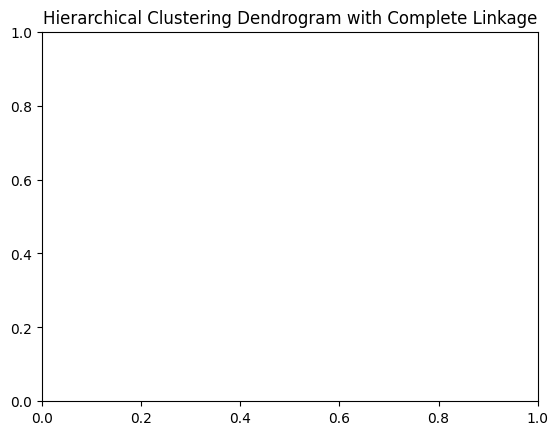

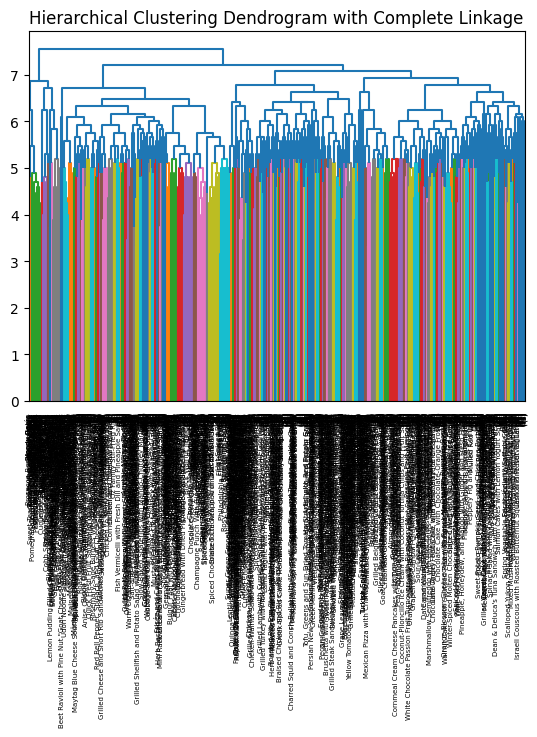

In [27]:
plt.figure()                                      
plt.title("Hierarchical Clustering Dendrogram with Complete Linkage")
plt.xlabel("")

plot_dendrogram(clust_3, truncate_mode = "level", p = 12,
                labels = epi.index)

plt.show()    

19. Unfortunately, this dendrogram isn't very helpful because there are so many observations! Let's try re-running your clusters with the same value of $K$ you used previously. Are your clusters somewhat stable, or did the interpretations change?

In [28]:
clust_3 = AgglomerativeClustering(n_clusters = 11, 
                                  linkage = 'complete').fit(epi)

epi.index[clust_3.labels_ == 0.0]

Index(['Mahi-Mahi in Tomato Olive Sauce ',
       'Ham and Spring Vegetable Salad with Shallot Vinaigrette ',
       'Tuna, Asparagus, and New Potato Salad with Chive Vinaigrette and Fried Capers ',
       'Roasted Sweet-Potato Spears with Bacon Vinaigrette ',
       'Grilled Beef, Jícama, and Apple Salad ',
       'Braised Chicken With Artichokes and Olives ',
       'Pancetta Roast Chicken with Walnut Stuffing ',
       'Collard-and-Prosciutto Chicken Roulades Over Watercress Salad ',
       'Braised Chicken and Rice with Orange, Saffron, Almond, and Pistachio Syrup ',
       'Braised Brisket with Bourbon-Peach Glaze ',
       ...
       'Baked Beans with Bacon and Brown Sugar ', 'Muffuletta Hot Dogs ',
       'Milk Braised Pork Shoulder with Semolina Gnocchi ', 'Perfect Rice ',
       'Eggs Benedict Salad ',
       'Stuffed Onions with Spiced Lamb and Pomegranate ',
       'Dill-Crusted Pork Tenderloin With Farro, Pea, and Blistered Tomato Salad ',
       'Cabbage Soup with Apples a

In [52]:
epi.index[clust_3.labels_ == 1.0]

Index(['Cucumber-Basil Egg Salad ', 'Herbed Goat Cheese Spread with Mint ',
       'Acini di Pepe Pasta with Garlic and Olives ',
       'Buttermilk-Spinach Spaetzle ',
       'Crispy Bruschetta with Goat Cheese, Tomatoes and Mint ',
       'Potato Pancakes with Chick-Pea Flour, Cilantro and Cumin ',
       'To Cook Dried Udon Noodles ', 'Cheese Puffs Gougères ',
       'Oven-Baked Pizza with Caramelized Onions, Gorgonzola, and Walnuts ',
       'Steamed Mussels with Sherry, Tomatoes and Garlic ',
       ...
       'Mussels With White Wine ',
       'Bell Pepper, Red Onion, and Goat Cheese Pizza ',
       'Buttery Steamed Mussels with Sake and Chiles ',
       'Citrus Marinated Shrimp Cocktail ',
       'Crabmeat Crostini with Chives and Crème Fraîche ',
       'Jalapeño Popper Fritters with Tomato Salsa ',
       'Roasted Oysters with Pickled Radishes, Carrots and Celery Root ',
       'Summer Vegetable Tart ',
       'Shrimp with Garlic and Toasted Bread Crumbs ',
       'Herbed Goat

In [53]:
epi.index[clust_3.labels_ == 2.0] ## similar to cluster 5

Index(['Banana-Chocolate Chip Cake With Peanut Butter Frosting ',
       'Sweet Buttermilk Spoon Breads ', 'Apricot-Cherry Shortcakes ',
       'Pastry Twists with Spiced Sugar-Honey Glaze ',
       'Coconut-Key Lime Sheet Cake ', 'Pumpkin Muffins ',
       'Mixed Berry Pavlovas ', 'Orange-Almond Cake with Chocolate Icing ',
       'White Chocolate Tartlets with Strawberries and Bananas ',
       'Pear-Hazelnut Cheesecakes with Pear-Raspberry Sauce ',
       ...
       'Cider-Caramel Sauce ', 'Amaretti Tiramisu ',
       'No-Bake Blueberry Cheesecake with Graham Cracker Crust ',
       'Date and Oatmeal Yogurt Muffins ', 'Semolina Gnocchi ',
       'Chocolate Chunks with Cherries and Pistachios ',
       'Ice Cream Sundaes with Chocolate-Coffee Sauce ',
       'Phyllo Pizza with Smoked Mozzarella and Cherry Tomatoes ',
       'Strawberry-Strawberry Cheesecake ', 'White Miso Peach/Pear/Apple '],
      dtype='object', name='title', length=2214)

In [54]:
epi.index[clust_3.labels_ == 3.0]

Index(['Lentil, Apple, and Turkey Wrap ',
       'Boudin Blanc Terrine with Red Onion Confit ',
       'Potato and Fennel Soup Hodge ', 'Spinach Noodle Casserole ',
       'The Best Blts ', 'Spicy-Sweet Kumquats ', 'Korean Marinated Beef ',
       'Yams Braised with Cream, Rosemary and Nutmeg ', 'Spicy Noodle Soup ',
       'Beef Tenderloin with Garlic and Brandy ',
       ...
       'Bacon-Wrapped Maple Pork Loin ', 'Chicken with White Wine and Herbs ',
       'Date Purée ',
       'Crispy Salt and Pepper Chicken with Caramelized Fennel and Shallots ',
       'Orange-Tini ', 'Blueberry Compote ', 'Chinese Barbecued Spareribs ',
       'Parmesan Puffs ', 'Snapper on Angel Hair with Citrus Cream ',
       'Baked Ham with Marmalade-Horseradish Glaze '],
      dtype='object', name='title', length=11901)

In [55]:
epi.index[clust_3.labels_ == 4.0]

Index(['Fontina Mac with Squash and Sage ', 'Purple-Potato and Crab Gratin ',
       'Romaine, Grilled Avocado, and Smoky Corn Salad with Chipotle-Caesar Dressing ',
       'Southwest Corn Bread Stuffing with Corn and Green Chilies ',
       'Scarborough Fair Tofu Burger ',
       'Roasted Butternut Squash, Rosemary, and Garlic Lasagne ',
       'Roasted Acorn Squash and Chestnuts ', 'Jeweled Rice ',
       'Savoy Cabbage and Arugula Salad ', 'Parsnip and Apple Soup ',
       ...
       'Shirazi Salad ', 'Green Beans with Shallots, Hazelnuts, and Tarragon ',
       'Radicchio, Grapefruit and Spinach Salad ', 'Chicken (Pot) Handpies ',
       'Roasted Spring Vegetables ',
       'Wilted Spinach Salad with Warm Feta Dressing ',
       'Grilled Eggplant and Bell Peppers with Roasted-Garlic Oil ',
       'Mixed Green Salad with Roquefort Vinaigrette ',
       'Spinach with Chickpeas and Fried Eggs ',
       'Artichoke and Parmesan Risotto '],
      dtype='object', name='title', length=1748

In [56]:
epi.index[clust_3.labels_ == 5.0]

Index(['Pear Champagne Cocktail ', 'Passion Fruit Mimosas ',
       'Pomegranate-Champagne Punch ', 'Kumquat Champagne Cocktail ',
       'Blood-Orange Mimosas ', 'Ruby Champagne Cocktail ',
       'New-Look Bloody Mary ', 'Pomegranate Mimosas ',
       'Passion Fruit Champagne Cocktail ', 'Harvey Wallbanger ',
       'Bloody Beers ', 'Cranberry Champagne Cocktail ', 'Rabbit Punch ',
       'Bloody Beers ', 'Amaretto Mimosa ', 'Rhubarb Collins ',
       'Champagne Fizz ', 'Baby Bellini ', 'Pomegranate Cocktail ',
       'The Dandy Lion ', 'Tomato Water Bloody Mary ',
       'Sweet Tea with Vodka and Lemonade ', 'Pink Greyhound ',
       'Jealous Marys ', 'Pomegranate-Champagne Punch ', 'Deluxe Kir Royale ',
       'Fresh Tomato Bloody Marys ', 'Passion-Fruit Mimosa ',
       'Prosecco-Raspberry Gelée ', 'Tomato-Water Bloody Mary ',
       'Buck's Fizz II ', 'Mike Romanoff ', 'Peach Prosecco ',
       'Leland Palmer ', 'Blood-Orange Rum Punch ',
       'Raspberry Champagne Cocktail ',
 

In [57]:
epi.index[clust_3.labels_ == 6.0]

Index(['Grilled Grapefruit with Pomegranate Molasses Glaze ',
       'Red, White, and Blue Ice Cream Cake ', 'Honeydew-Lime Pops ',
       'Lemon Pudding with Strawberries and Meringue Cigars ',
       'Fresh Strawberry Sorbet ',
       'Blueberry Muffins with Lemon Blackberry Glaze ', 'Pineapple Paletas ',
       'Berry Walnut Cereal ', 'Coconut and Pistachio Baklava ',
       'Lemon Ice Cream with Candied Lemon Peel ',
       'Strawberry-Blueberry Pops ', 'Lemon and Blueberry Ice Cream Terrine ',
       'Goat Cheese Ice Cream with Roasted Red Cherries ',
       'Caramelized Bananas ', 'Ice Cream Bombe ',
       'Balsamic-Blackberry Crème Brûlée ', 'Apricot-Cherry Trifle ',
       'Balsamic-Strawberry Pops ',
       'Sorbet and Ice Cream Terrine with Blackberry Compote ',
       'Red Wine-Raspberry Sorbet ',
       'Lemon Pudding with Strawberries and Meringue Cigars ',
       'Blues-Busting Blueberry Ice Cream ', 'Almond, Plum and Peach Pie ',
       'Peanut Butter Banana Ice Cream '

In [58]:
epi.index[clust_3.labels_ == 7.0]

Index(['Salmon with Chili-Mango Salsa ',
       'Cold Poached Chicken with Chinese Garlic Sauce ',
       'Grilled Peppered Dry Spareribs ',
       'Bo Ssäm Grilled Pork and Pickled Slaw in Lettuce Cups ',
       'Smoked-Turkey, Plum, and Fennel Salad ', 'Coconut Chicken Soup ',
       'Andouille-Stuffed Pork Loin with Creole Mustard ',
       'Grilled Jerk Pork With Curried Peach Relish ',
       'Green Curry Pork Tenderloin ',
       'Jicama Salad with Lime Juice and Fresh Mint ',
       'Duck Ragù with Creamy Polenta ',
       'Grilled Lemon Chicken Salad with Dill Cream Dressing ',
       'Grilled Pork Chops with Clams and Chorizo ',
       'Cold-Smoked Chicken with Baby Bok Choy and Cashew Salad ',
       'Chicken-Walnut Salad with Potato Salad, Tomatoes, and Kalamata Olives ',
       'Grilled Boneless Salmon Steaks with Horseradish Dill Butter ',
       'Chicken, Watercress, and Avocado Sandwich with Tarragon Aïoli ',
       'Grilled Pork Chops with Cherry Relish ', 'Rosemary Por

In [59]:
epi.index[clust_3.labels_ == 8.0]

Index(['Rosé, Bourbon, and Blue ', 'Tuscan Kale Caesar Slaw ',
       'Celery, Apple, and Fennel Slaw ',
       'Potato Salad with Mustard Vinaigrette ', 'Chile-Thyme Spice Mix ',
       'Quick Pickled Cucumbers ', 'Cucumber, Tomato and Feta Salad ',
       'Guinness BBQ Sauce ', 'Blueberry Shrub ', 'Zucchini and Corn Tacos ',
       'Mesa Barbecue Sauce ', 'Guinness BBQ Sauce ', 'Chile-Thyme Spice Mix ',
       'Sweet Tea ', 'Cobb Salad with Balsamic Shallot Vinaigrette ',
       'Carolina Mustard Sauce ', 'Sweet Tea ', 'Mesa Barbecue Sauce ',
       'Ruben's Cooler No. 2 ', 'Strawberry BBQ Sauce ', 'Chilled Corn Soup ',
       'Baltimore Crab Cakes ', 'Carolina Mustard Sauce ',
       'Tipsy Tea with Homemade Sweet Tea '],
      dtype='object', name='title')

In [60]:
epi.index[clust_3.labels_ == 9.0]

Index(['Rosemary and Thyme Walnuts ', 'Five-Spice Pecan ',
       'Beet Ravioli with Pine Nut "Goat Cheese" Rosemary-Cream Sauce, Aged Balsamic Vinegar ',
       'Vegan Mayonnaise ', 'Double Nutty Toast ',
       'Fruit Salad and Spritzer '],
      dtype='object', name='title')

In [61]:
epi.index[clust_3.labels_ == 10.0]

Index(['Ham Persillade with Mustard Potato Salad and Mashed Peas ',
       'Green Bean, Red Onion, and Roast Potato Salad with Rosemary Vinaigrette ',
       'Sauteed Broccoli Rabe ', 'Better-Than-Pita Grill Bread ',
       'Spicy Black Beans and Rice ', 'Citrus Salad with Mint Sugar ',
       'Mexican Chile and Mushroom Soup ',
       'Tomato-Infused Bulgur Pilaf with Fresh Basil ', 'Ricotta Omelets ',
       'Apricot-Pistachio Muffins Baked on the Grill ',
       ...
       'Fresh Green Peas and Sugar Snap Peas in Sesame Dressing ',
       'Spinach and Celery Salad with Lemon Vinaigrette ',
       'Butternut Squash Soup with Roasted Red Pepper Purée ',
       'Cranberry Relish ', 'Pumpkin-Pear Crisps ',
       'Noreen Kinney's Irish Soda Bread ', 'Garlic Mashed Potatoes ',
       'Wilted Red Cabbage and Bell Pepper Slaw ',
       'Roasted and Raw Carrot Salad with Avocado and Toasted Cumin Vinaigrette ',
       'Cauliflower Purée '],
      dtype='object', name='title', length=1536)

\textcolor{blue}{There are some similarities (i.e., a cluster with desserts), but some differences as well! For example, consider Cluster 10, which is very small. These are exactly the same as before, perhaps they would be more stable with a smaller number of clusters..}